# Moount google drive to colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [ ]:
import os
import random 
import numpy as np
import shutil
import time 
from PIL import Image, ImageOps
import cv2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import ImageDataGenerator

from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
from keras import losses


# Initialize basic working directories

In [ ]:
directory = "drive/MyDrive/Datasets/Sign digits/Dataset"
trainDir = "train"
testDir = "test"
os.chdir(directory)

# Split data into train and test sets ** RUN ONLY ONCE **

In [ ]:
for cls in range(0,10):
  dataClass = str(cls)
  test_dir = "test/"+str(cls)
  train_dir = "train/"+str(cls)
  
  allFileNames = os.listdir(str(cls))
  np.random.shuffle(allFileNames)
  test_FileNames,train_FileNames = np.split(np.array(allFileNames),
                                                            [int(200*0.25)])
  
  test_FileNames = [dataClass+'/'+ name for name in test_FileNames.tolist()]
  train_FileNames = [dataClass+'/'+ name for name in train_FileNames.tolist()]

  for name in test_FileNames:
    shutil.copy(name, test_dir)
  for name in train_FileNames:
    shutil.copy(name, train_dir)

# Data augmentation process ** RUN ONLY ONCE **

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
dataTrain = []
dataTest = []
labelsTrain = []
labelsTest = []

rotationGenerator = ImageDataGenerator(rotation_range=35)
zoomGenerator = ImageDataGenerator(zoom_range=0.5)
flipGenerator = ImageDataGenerator(horizontal_flip=True)
brightnessGenerator = ImageDataGenerator(brightness_range=(0.4,0.8))


for cls in range(0,10):

  dataClass = str(cls)
  my_dir = 'augmented/train/'+str(cls)

  # keep a list of all image names of train and test set
  imagesTrain = os.listdir(my_dir)
  temp = imagesTrain
  rotationImages,restImages  = np.split(np.array(imagesTrain), [60])
  zoomImages,restImages  = np.split(np.array(restImages), [50])
  brightnessImages,restImages  = np.split(np.array(restImages), [30])
  flipImages,restImages  = np.split(np.array(imagesTrain), [60])

  # Rotation augmentation
  for img in rotationImages:
    #print('ok')
    # open all train images one by one
    image = np.array(Image.open(my_dir + '/' + img))
    image = np.expand_dims(image, 0)
    it  = rotationGenerator.flow(image, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    image = Image.fromarray(image)
    image.save('augmented/train/test/'+dataClass+'/'+img+'.png')

  # Zoom augmentation
  for img in zoomImages:
    #print('ok')
    # open all train images one by one
    image = np.array(Image.open(my_dir + '/' + img))
    image = np.expand_dims(image, 0)
    it  = zoomGenerator.flow(image, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    image = Image.fromarray(image)
    image.save('augmented/train/test/'+dataClass+'/'+img+'.png')

  # Flip augmentation
  for img in brightnessImages:
    #print('ok')
    # open all train images one by one
    image = np.array(Image.open(my_dir + '/' + img))
    image = np.expand_dims(image, 0)
    it  = brightnessGenerator.flow(image, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    image = Image.fromarray(image)
    image.save('augmented/train/test/'+dataClass+'/'+img+'.png')

  # Brightness augmentation
  for img in flipImages:
    #print('ok')
    # open all train images one by one
    image = np.array(Image.open(my_dir + '/' + img))
    image = np.expand_dims(image, 0)
    it  = flipGenerator.flow(image, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    image = Image.fromarray(image)
    image.save('augmented/train/test/'+dataClass+'/'+img+'.png')

print("[INFO] Images are loaded.")

# Import augmented dataset

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
dataTrain = []
dataTest = []
labelsTrain = []
labelsTest = []

for cls in range(0,10):

  dataClass = str(cls)
  test_dir = "augmented/test/"+str(cls)
  train_dir = "augmented/train/"+str(cls)
  
  # keep a list of all image names of train and test set
  imagesTrain = os.listdir(train_dir)
  imagesTest = os.listdir(test_dir)
 
  for i in range(len(imagesTrain)):

    # open all train images one by one
    image = np.array(Image.open(train_dir + '/' + imagesTrain[i]))
    image = image.flatten()
    if (len(image.tolist())) > 30000:
       continue
    # keep all image flattened arrays in a list
    dataTrain.append(image)
    # add label
    labelsTrain.append(str(cls))

  # same thing for test set
  for i in range(len(imagesTest)):

    #image = np.array(ImageOps.grayscale(Image.open(test_dir + '/' + imagesTest[i])))
    image = np.array(Image.open(test_dir + '/' + imagesTest[i]))
    image = image.flatten()
    if (len(image.tolist())) > 30000:
       continue
    dataTest.append(image)
    labelsTest.append(str(cls))
      
  
  print('ok' + str(cls))
  print('class '+ str(cls) + str(len(dataTrain)))
  print('class '+ str(cls) + str(len(dataTest)))

  # scale the raw pixel intensities to the range [0, 1]

  augmentedTrainX = np.array(dataTrain) 
  augmentedTestX = np.array(dataTest) 
  augmentedTrainY = np.array(labelsTrain)
  augmentedTestY = np.array(labelsTest)

print('Type of trainX and testX: ' + str(type(augmentedTrainX)))
print('Shape of trainX array: ' + str(augmentedTrainX.shape))
print('dataTest shape: ' + str(len(dataTest)))
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Images are loaded.")


[INFO] loading images...
ok0
class 0310
class 054
ok1
class 1622
class 1104
ok2
class 2934
class 2154
ok3
class 31246
class 3204
ok4
class 41560
class 4254
ok5
class 51874
class 5304
ok6
class 62188
class 6354
ok7
class 72496
class 7403
ok8
class 82812
class 8453
ok9
class 93120
class 9503
Type of trainX and testX: <class 'numpy.ndarray'>
Shape of trainX array: (3120, 30000)
dataTest shape: 503
Time taken: 1602.1 seconds
[INFO] Images are loaded.


In [ ]:
lb = LabelBinarizer()
augmentedTrainY = lb.fit_transform(augmentedTrainY)   
augmentedTestY = lb.transform(augmentedTestY) 
trainY

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
scalerTrain = MinMaxScaler(feature_range=(-1, 1))
augmented_NormalizedTrainX = augmentedTrainX
scalerTrain.fit(augmented_NormalizedTrainX)
augmented_NormalizedTrainX = scalerTrain.transform(augmented_NormalizedTrainX)

scalerTest = MinMaxScaler(feature_range=(-1, 1))
augmented_NormalizedTestX = augmentedTestX
scalerTest.fit(augmented_NormalizedTestX)
augmented_NormalizedTestX = scalerTest.transform(augmented_NormalizedTestX)

# Import original dataset

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
dataTrain = []
dataTest = []
labelsTrain = []
labelsTest = []

for cls in range(0,10):

  dataClass = str(cls)
  test_dir = "test/"+str(cls)
  train_dir = "train/"+str(cls)
  
  # keep a list of all image names of train and test set
  imagesTrain = os.listdir(train_dir)
  imagesTest = os.listdir(test_dir)
 
  for i in range(len(imagesTrain)):

    # open all train images one by one
    image = np.array(Image.open(train_dir + '/' + imagesTrain[i]))
    image = image.flatten()
    if (len(image.tolist())) > 30000:
       continue
    # keep all image flattened arrays in a list
    dataTrain.append(image)
    # add label
    labelsTrain.append(str(cls))

  # same thing for test set
  for i in range(len(imagesTest)):

    #image = np.array(ImageOps.grayscale(Image.open(test_dir + '/' + imagesTest[i])))
    image = np.array(Image.open(test_dir + '/' + imagesTest[i]))
    image = image.flatten()
    if (len(image.tolist())) > 30000:
       continue
    dataTest.append(image)
    labelsTest.append(str(cls))
      
  
  print('ok' + str(cls))
  print('class '+ str(cls) + str(len(dataTrain)))
  print('class '+ str(cls) + str(len(dataTest)))

  # scale the raw pixel intensities to the range [0, 1]

  trainX = np.array(dataTrain) 
  testX = np.array(dataTest) 
  trainY = np.array(labelsTrain)
  testY = np.array(labelsTest)

print('Type of trainX and testX: ' + str(type(trainX)))
print('Shape of trainX array: ' + str(trainX.shape))
print('dataTest shape: ' + str(len(dataTest)))
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Images are loaded.")


[INFO] loading images...
ok0
class 0155
class 054
ok1
class 1311
class 1104
ok2
class 2467
class 2154
ok3
class 3623
class 3204
ok4
class 4780
class 4254
ok5
class 5937
class 5304
ok6
class 61094
class 6354
ok7
class 71248
class 7403
ok8
class 81406
class 8453
ok9
class 91560
class 9503
Type of trainX and testX: <class 'numpy.ndarray'>
Shape of trainX array: (1560, 30000)
dataTest shape: 503
Time taken: 819.1 seconds
[INFO] Images are loaded.


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   
testY = lb.transform(testY) 
trainY

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# Explore the dataset

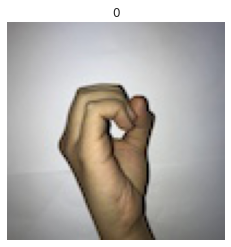

In [ ]:
test = os.listdir('train/0')
plt.axis('off')
plt.title(0)
test[0]
testImg = np.array(Image.open('train/0/'+test[0]))
plt.imshow(testImg)

In [ ]:
def visualizeImage(imageDir, label):

  image = ImageOps.grayscale(Image.open(imageDir))

  plt.axis('off')
  plt.title(label)
  plt.imshow(image, cmap='gray', interpolation='none')

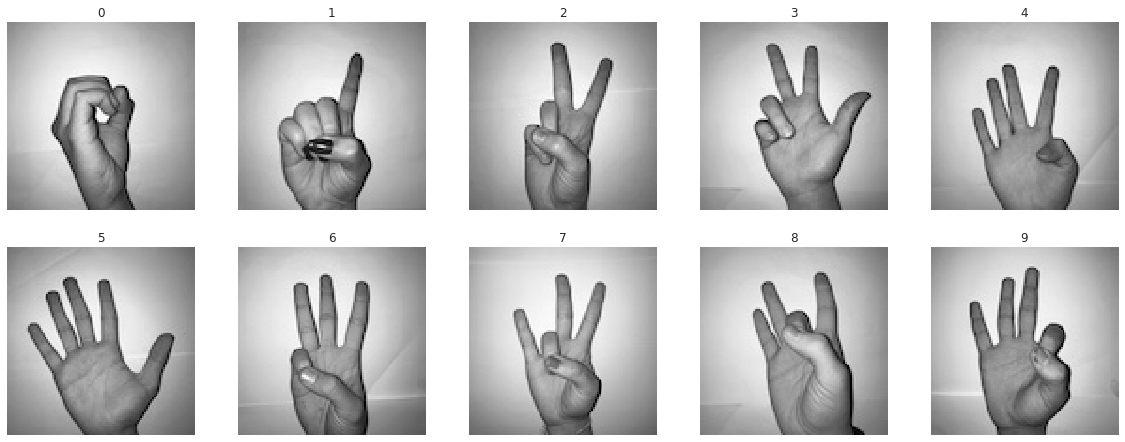

In [ ]:
plt.figure(figsize=(20,20))
for i in range(10):

  plt.subplot(5,5,i+1)
  firstImage = os.listdir('train/'+str(i))[0]
  imageDir = 'train/'+str(i)+'/'+firstImage
  visualizeImage(imageDir,i)


# Exercise 1.a | Create the Artificial Neural Network (ANN)


In [ ]:
model_a = models.Sequential()

model_a.add(tf.keras.Input(shape=(30000)))
model_a.add(layers.Dense(512))
model_a.add(layers.Dense(256))
model_a.add(layers.Dense(128))
model_a.add(layers.Dense(10, activation='softmax'))

model_a.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               15360512  
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 15,526,026
Trainable params: 15,526,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

time1 = time.time()   # to measure time taken

# Train the model
history_a = model_a.fit(
      normalizedTrainX,
      trainY,
      validation_data=(normalizedTestX,testY),
      epochs=50,
      batch_size=512
      )

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/50
4/4 [==============================] - 1s 101ms/step - loss: 9.0971 - acc: 0.1095 - val_loss: 9.6786 - val_acc: 0.2604
Epoch 2/50
4/4 [==============================] - 0s 48ms/step - loss: 10.7800 - acc: 0.2713 - val_loss: 8.6662 - val_acc: 0.2684
Epoch 3/50
4/4 [==============================] - 0s 49ms/step - loss: 8.4135 - acc: 0.3118 - val_loss: 4.7263 - val_acc: 0.3002
Epoch 4/50
4/4 [==============================] - 0s 48ms/step - loss: 3.8026 - acc: 0.4014 - val_loss: 5.2529 - val_acc: 0.2684
Epoch 5/50
4/4 [==============================] - 0s 54ms/step - loss: 4.1868 - acc: 0.3197 - val_loss: 3.0515 - val_acc: 0.4195
Epoch 6/50
4/4 [==============================] - 0s 48ms/step - loss: 2.0374 - acc: 0.5260 - val_loss: 2.7221 - val_acc: 0.4394
Epoch 7/50
4/4 [==============================] - 0s 50ms/step - loss: 2.2148 - acc: 0.4982 - val_loss: 2.1802 - val_acc: 0.4990
Epoch 8/50
4/4 [==============================] - 0s 49ms/step - loss: 1.4128 - acc: 0.5962 - v

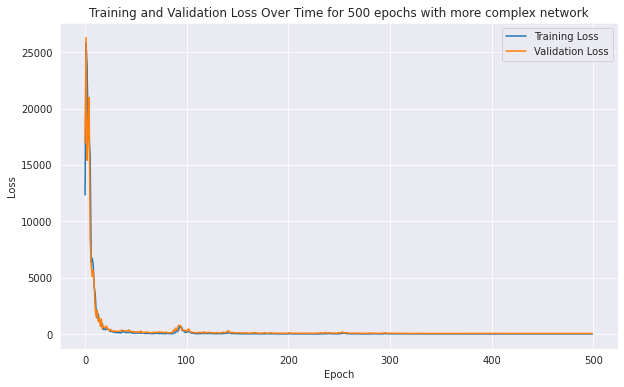

In [ ]:
plt.figure(figsize=(10, 6))

epochs_range = range(len(history_a.history['loss']))

plt.plot(epochs_range, history_a.history['loss'], label="Training Loss")
plt.plot(epochs_range, history_a.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time for 500 epochs with more complex network")
plt.show()

In [ ]:
score = model_a.evaluate(normalizedTestX,testY)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 0s 4ms/step - loss: 1.2994 - acc: 0.6481
===Testing loss and accuracy===
Test loss:  1.2994415760040283
Test accuracy:  0.6481113433837891



## Exercise 1.b | Solution for over/underfitting


In [ ]:
model_a_aug = models.Sequential()

model_a_aug.add(tf.keras.Input(shape=(30000)))
model_a_aug.add(layers.Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model_a_aug.add(layers.Dense(128,activation='relu'))
model_a_aug.add(layers.Dropout(0.2))
model_a_aug.add(layers.Dense(10, activation='softmax'))

model_a_aug.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               7680256   
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 7,714,442
Trainable params: 7,714,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_a_aug.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

time1 = time.time()   # to measure time taken

# Train the model
history_a_aug = model_a_aug.fit(
      augmented_NormalizedTrainX,
      augmentedTrainY,
      validation_data=(augmented_NormalizedTestX,augmentedTestY),
      epochs=100,
      batch_size=512
      )

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/100
7/7 [==============================] - 1s 60ms/step - loss: 55.6946 - acc: 0.1641 - val_loss: 52.8198 - val_acc: 0.3718
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 51.9988 - acc: 0.3949 - val_loss: 49.4001 - val_acc: 0.4573
Epoch 3/100
7/7 [==============================] - 0s 44ms/step - loss: 48.5576 - acc: 0.5182 - val_loss: 46.1449 - val_acc: 0.5408
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 45.3413 - acc: 0.5825 - val_loss: 43.1154 - val_acc: 0.5845
Epoch 5/100
7/7 [==============================] - 0s 41ms/step - loss: 42.2895 - acc: 0.6565 - val_loss: 40.2262 - val_acc: 0.6143
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 39.3994 - acc: 0.7093 - val_loss: 37.4246 - val_acc: 0.6421
Epoch 7/100
7/7 [==============================] - 0s 41ms/step - loss: 36.5941 - acc: 0.7511 - val_loss: 34.7798 - val_acc: 0.6660
Epoch 8/100
7/7 [==============================] - 0s 41ms/step - loss: 33.9

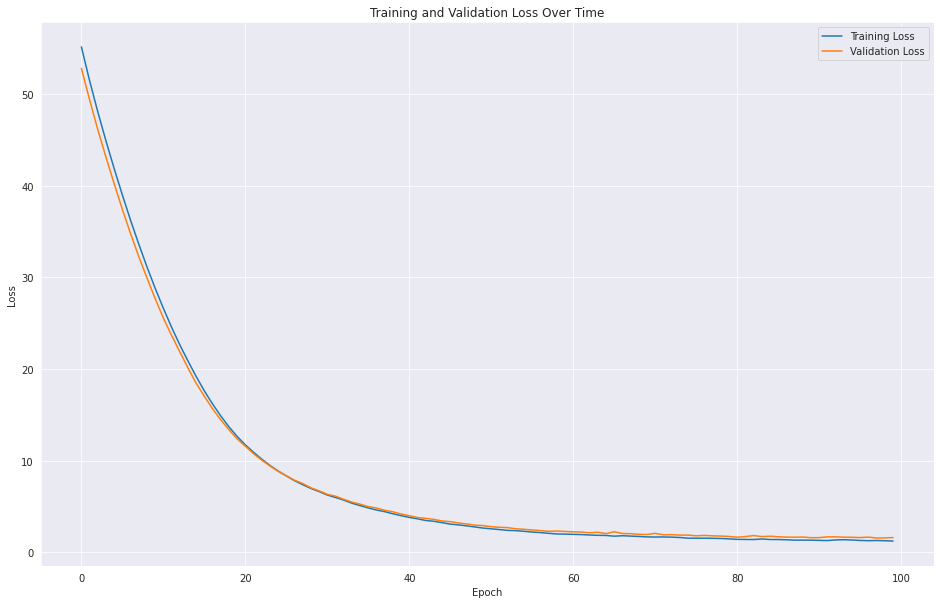

In [ ]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history_a_aug.history['loss']))

plt.plot(epochs_range, history_a_aug.history['loss'], label="Training Loss")
plt.plot(epochs_range, history_a_aug.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [ ]:
score = model_a_aug.evaluate(augmented_NormalizedTestX,augmentedTestY)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 0s 4ms/step - loss: 1.6083 - acc: 0.7416
===Testing loss and accuracy===
Test loss:  1.6082500219345093
Test accuracy:  0.7415506839752197


# Best number of epochs

In [ ]:
model = models.Sequential()

model.add(tf.keras.Input(shape=(30000)))
model.add(layers.Dense(256))
model.add(layers.Dense(128))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 2,594,442
Trainable params: 2,594,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.1
EPOCHS = 50

# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
#opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
time1 = time.time()   # to measure time taken
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

[INFO] training network...
Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 13688.7034 - accuracy: 0.0947 - val_loss: 2325.1377 - val_accuracy: 0.1443
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 2378.2347 - accuracy: 0.1807 - val_loss: 1664.2706 - val_accuracy: 0.2525
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 1064.0710 - accuracy: 0.2928 - val_loss: 1400.4081 - val_accuracy: 0.1463
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 541.3858 - accuracy: 0.4003 - val_loss: 300.1750 - val_accuracy: 0.4870
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 314.8360 - accuracy: 0.5018 - val_loss: 754.2337 - val_accuracy: 0.2946
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 374.5639 - accuracy: 0.4984 - val_loss: 410.0044 - val_accuracy: 0.3788
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 308.6071 - accuracy: 0.4862 - 

In [ ]:
def evaluate_model(model, X_test, y_test_oneHot, labels):
    
    labels = np.array(labels)
    labels = labels.astype(int)
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    
    cm = confusion_matrix(labels, y_pred)
    clr = classification_report(labels, y_pred)
    
    results = model.evaluate(X_test, y_test_oneHot, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    

Test Loss: 25.70132
Test Accuracy: 65.13%


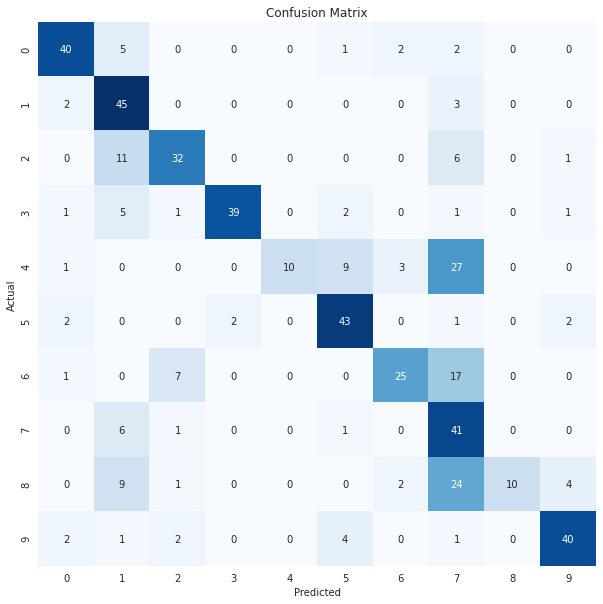

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        50
           1       0.55      0.90      0.68        50
           2       0.73      0.64      0.68        50
           3       0.95      0.78      0.86        50
           4       1.00      0.20      0.33        50
           5       0.72      0.86      0.78        50
           6       0.78      0.50      0.61        50
           7       0.33      0.84      0.48        49
           8       1.00      0.20      0.33        50
           9       0.83      0.80      0.82        50

    accuracy                           0.65       499
   macro avg       0.77      0.65      0.64       499
weighted avg       0.77      0.65      0.64       499



In [ ]:
evaluate_model(model, testX, testY, labelsTest)

# Exercise 1.c | Normalization and relu

In [ ]:
scalerTrain = MinMaxScaler(feature_range=(-1, 1))
normalizedTrainX = trainX
scalerTrain.fit(normalizedTrainX)
normalizedTrainX = scalerTrain.transform(normalizedTrainX)

scalerTest = MinMaxScaler(feature_range=(-1, 1))
normalizedTestX = testX
scalerTest.fit(normalizedTestX)
normalizedTestX = scalerTest.transform(normalizedTestX)

In [ ]:
model_c = models.Sequential()

model_c.add(tf.keras.Input(shape=(30000)))
model_c.add(layers.Dense(256,activation='relu'))
model_c.add(layers.Dense(128,activation='relu'))
model_c.add(layers.Dense(10, activation='softmax'))

model_c.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               7680256   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 7,714,442
Trainable params: 7,714,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

time1 = time.time()   # to measure time taken

# Train the model
history_c = model_c.fit(
      normalizedTrainX,
      trainY,
      validation_data=(normalizedTestX,testY),
      epochs=50,
      batch_size=512
      )

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 2.5826 - acc: 0.1161 - val_loss: 2.2139 - val_acc: 0.2187
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 2.1015 - acc: 0.2828 - val_loss: 1.9994 - val_acc: 0.2704
Epoch 3/50
4/4 [==============================] - 0s 46ms/step - loss: 1.9315 - acc: 0.3124 - val_loss: 1.8180 - val_acc: 0.4115
Epoch 4/50
4/4 [==============================] - 0s 45ms/step - loss: 1.6800 - acc: 0.4534 - val_loss: 1.7049 - val_acc: 0.4354
Epoch 5/50
4/4 [==============================] - 0s 45ms/step - loss: 1.5295 - acc: 0.5161 - val_loss: 1.5913 - val_acc: 0.5030
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 1.3532 - acc: 0.5784 - val_loss: 1.4515 - val_acc: 0.5129
Epoch 7/50
4/4 [==============================] - 0s 49ms/step - loss: 1.2182 - acc: 0.6251 - val_loss: 1.3470 - val_acc: 0.5567
Epoch 8/50
4/4 [==============================] - 0s 48ms/step - loss: 1.1193 - acc: 0.6652 - val

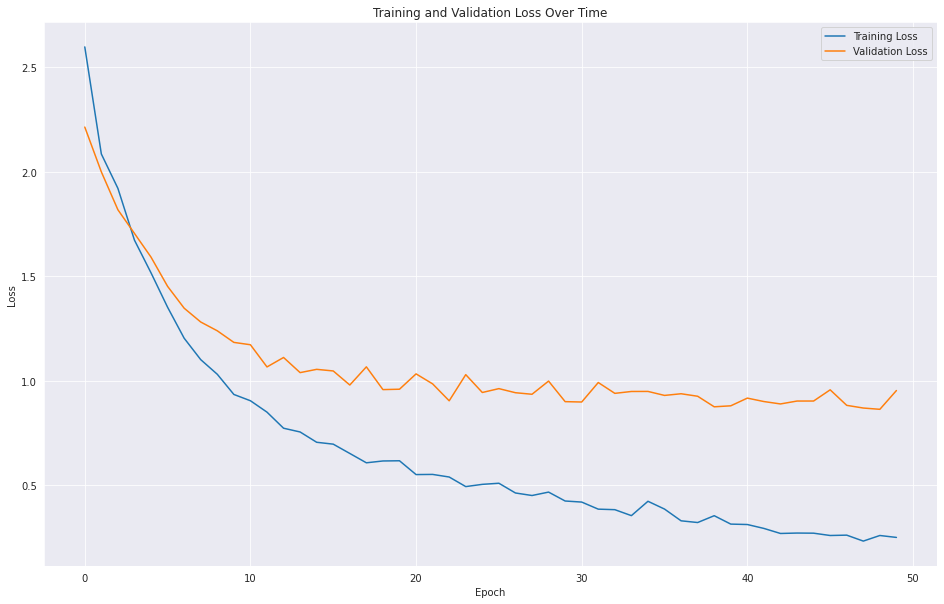

In [ ]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history_c.history['loss']))

plt.plot(epochs_range, history_c.history['loss'], label="Training Loss")
plt.plot(epochs_range, history_c.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [ ]:
score = model_c.evaluate(normalizedTestX,testY)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 0s 4ms/step - loss: 0.9530 - acc: 0.6899
===Testing loss and accuracy===
Test loss:  0.9529592990875244
Test accuracy:  0.6898608207702637


# Exercise 1.d | Batch normalization




In [ ]:
model_d = models.Sequential()

model_d.add(tf.keras.Input(shape=(30000)))
model_d.add(layers.BatchNormalization())
model_d.add(layers.Dense(256,activation='relu'))
model_d.add(layers.BatchNormalization())
model_d.add(layers.Dense(128,activation='relu'))
model_d.add(layers.Dense(10, activation='softmax'))

model_d.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 30000)             120000    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               7680256   
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 7,835,466
Trainable params: 7,774,954
Non-trainable params: 60,512
_________________________________________________________________


In [ ]:
# Compile the model
model_d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

time1 = time.time()   # to measure time taken

# Train the model
history_d = model_d.fit(
      normalizedTrainX,
      trainY,
      validation_data=(normalizedTestX,testY),
      epochs=50,
      batch_size=512
      )

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/50
4/4 [==============================] - 1s 107ms/step - loss: 2.3238 - acc: 0.2150 - val_loss: 1.9516 - val_acc: 0.2783
Epoch 2/50
4/4 [==============================] - 0s 50ms/step - loss: 1.0804 - acc: 0.6770 - val_loss: 1.9541 - val_acc: 0.2744
Epoch 3/50
4/4 [==============================] - 0s 52ms/step - loss: 0.8406 - acc: 0.7691 - val_loss: 1.7352 - val_acc: 0.3638
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 0.6962 - acc: 0.8425 - val_loss: 1.6429 - val_acc: 0.4036
Epoch 5/50
4/4 [==============================] - 0s 56ms/step - loss: 0.5984 - acc: 0.8669 - val_loss: 1.7382 - val_acc: 0.3618
Epoch 6/50
4/4 [==============================] - 0s 50ms/step - loss: 0.5295 - acc: 0.8765 - val_loss: 1.6288 - val_acc: 0.3996
Epoch 7/50
4/4 [==============================] - 0s 52ms/step - loss: 0.4812 - acc: 0.8933 - val_loss: 1.4212 - val_acc: 0.4871
Epoch 8/50
4/4 [==============================] - 0s 51ms/step - loss: 0.4134 - acc: 0.9156 - va

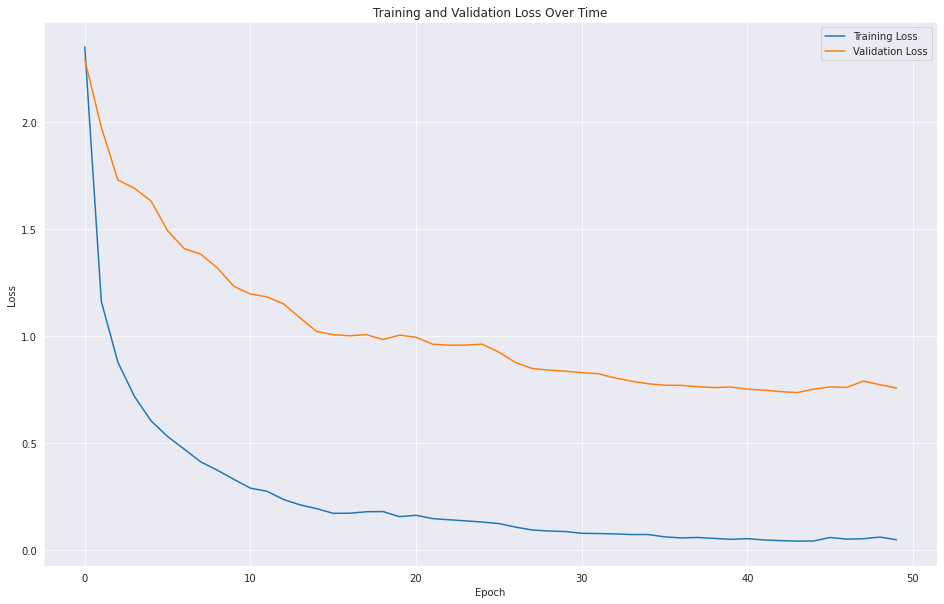

In [ ]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history_d.history['loss']))

plt.plot(epochs_range, history_d.history['loss'], label="Training Loss")
plt.plot(epochs_range, history_d.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [ ]:
score = model_d.evaluate(normalizedTestX,testY)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 0s 5ms/step - loss: 0.7557 - acc: 0.7594
===Testing loss and accuracy===
Test loss:  0.755653440952301
Test accuracy:  0.7594433426856995
